# EDA

### Hipóteses de Negócio a Serem Respondidas

- Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
- Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
- Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?
-------------------------------------------------------------------------------------------------
- Qual modelo de carro é o que aparece em primeiro lugar para venda na região sul?
- Qual é o tipo de carro que as concessionários menos possuem disponíveis para venda?
- Qual tipo de anunciante possui carros mais novos em média disponíveis para venda?

## Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 29)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Carregando os Dados

In [2]:
df = pd.read_csv("cars_train.csv", encoding="utf-16", sep="\t")
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


<IPython.core.display.Javascript object>

## Respondendo as Pergundas de Negócio

### Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

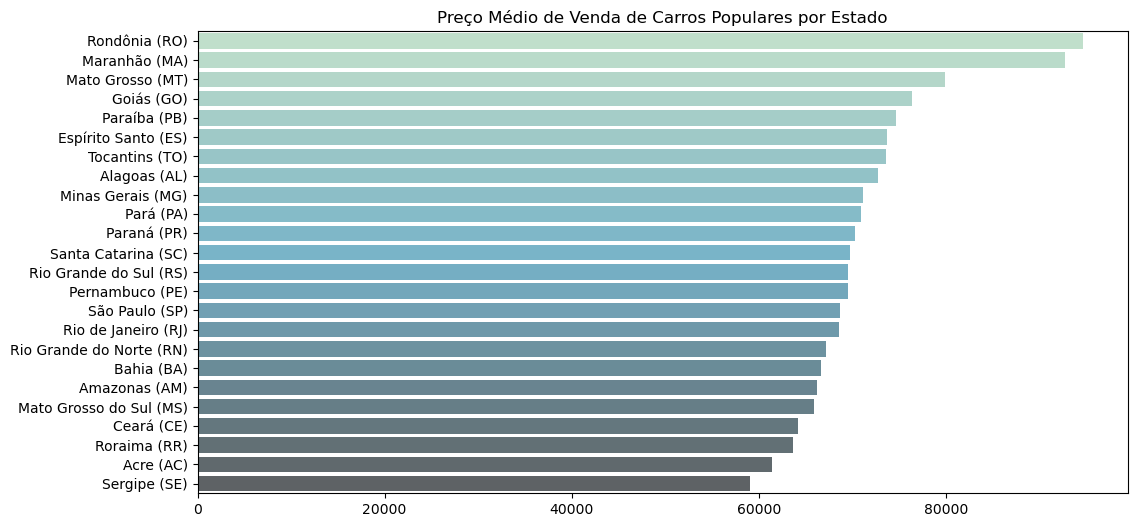

<IPython.core.display.Javascript object>

In [3]:
# Filtrando carros populares abaixo de R$ 100.000
carros_populares = df[df["preco"] < 100000]

# Agrupando por preço médio dos carros populares por estado a partir do mais alto
preco_carros_estado = (
    carros_populares.groupby("estado_vendedor")["preco"]
    .mean()
    .sort_values(ascending=False)
)

# Criando o dataframe para gerar o grafico
list_values = []

for value in preco_carros_estado.values:
    list_values.append(value)

df_preco_carros_estado = pd.DataFrame(
    {"preco_medio": list_values}, preco_carros_estado.index
)

# Gerando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="preco_medio",
    y=preco_carros_estado.index,
    data=df_preco_carros_estado,
    alpha=0.8,
    palette="GnBu_d",
)
plt.title("Preço Médio de Venda de Carros Populares por Estado")
plt.ylabel(None)
plt.xlabel(None)

plt.show()

Com base no critério que defini que carros populares possuem preço de venda abaixo dos 100 mil reais, o melhor estado para se vender um carro é Rondônia, pois é o estado que possui maior preço médio de venda, como mostra o gráfico acima.


### Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

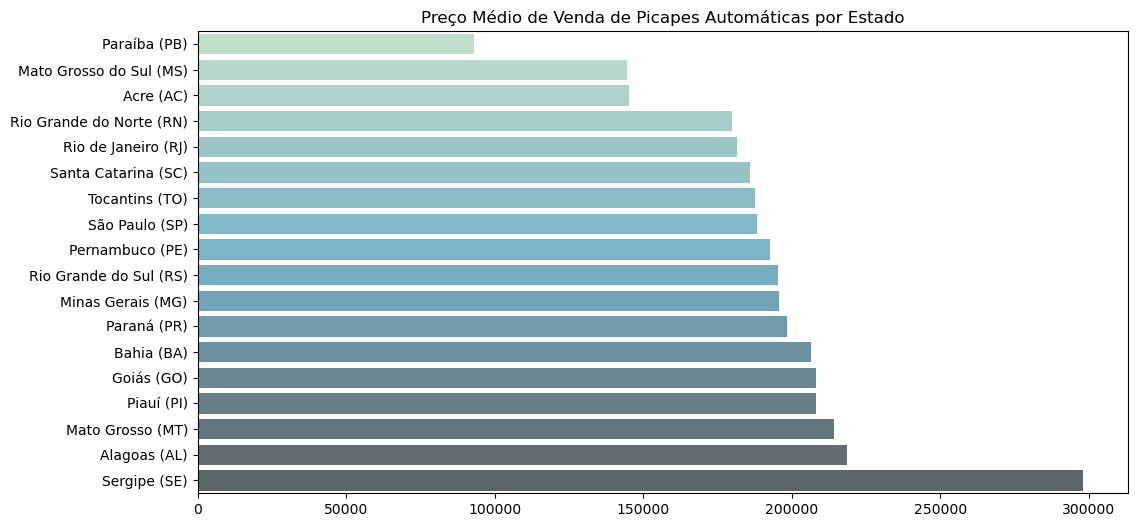

<IPython.core.display.Javascript object>

In [4]:
# Filtrando o dataset por carros de câmbio automático e do tipo Picape
picapes_automaticas = df[(df["cambio"] == "Automática") & (df["tipo"] == "Picape")]

# Agrupando por preço médio dos carros por estado a partir do mais baixo
picapes_automaticas_estado = (
    picapes_automaticas.groupby("estado_vendedor")["preco"].mean().sort_values()
)

# Criando o dataframe para gerar o gráfico
list_values = []

for value in picapes_automaticas_estado.values:
    list_values.append(value)

df_picapes_automaticas_estado = pd.DataFrame(
    {"preco_medio": list_values}, picapes_automaticas_estado.index
)

# Gerando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="preco_medio",
    y=picapes_automaticas_estado.index,
    data=df_picapes_automaticas_estado,
    alpha=0.8,
    palette="GnBu_d",
)
plt.title("Preço Médio de Venda de Picapes Automáticas por Estado")
plt.ylabel(None)
plt.xlabel(None)

plt.show()

O melhor estado para se comprar uma Picape automática é a Paraíba, pois é o estado que possui o menor preço médio de venda para este tipo de carro.

### Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

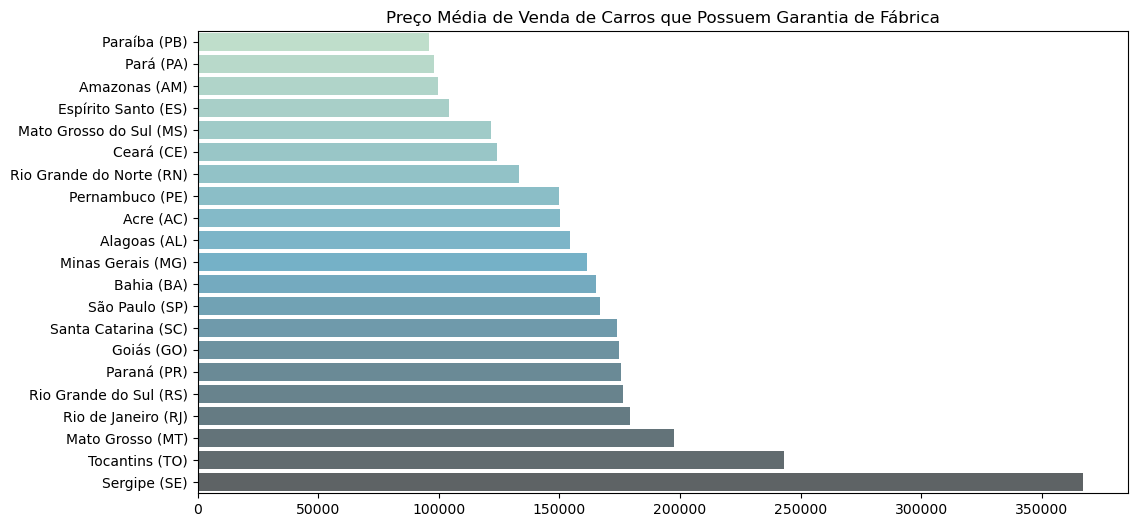

<IPython.core.display.Javascript object>

In [5]:
# Filtrando o dataset por carros que possuem garantia de fábrica
carros_com_garantia = df[df["garantia_de_fábrica"] == "Garantia de fábrica"]

# Agrupando por preço médio dos carros por estado a partir do mais baixo
carros_com_garantia_estado = (
    carros_com_garantia.groupby("estado_vendedor")["preco"].mean().sort_values()
)

# Criando o dataframe para gerar o gráfico
list_values = []

for value in carros_com_garantia_estado.values:
    list_values.append(value)

df_carros_com_garantia_estado = pd.DataFrame(
    {"preco_medio": carros_com_garantia_estado.values}, carros_com_garantia_estado.index
)

# Gerando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="preco_medio",
    y=carros_com_garantia_estado.index,
    data=df_carros_com_garantia_estado,
    alpha=0.8,
    palette="GnBu_d",
)
plt.title("Preço Média de Venda de Carros que Possuem Garantia de Fábrica")
plt.ylabel(None)
plt.xlabel(None)

plt.show()

O melhor estado para se comprar um carro que possue garantia de fábrica é a Paraíba, pois é o estado que possue o menor preço de venda média para carros com esta característica.

### Qual modelo de carro é o que aparece em primeiro lugar para venda na região sul?


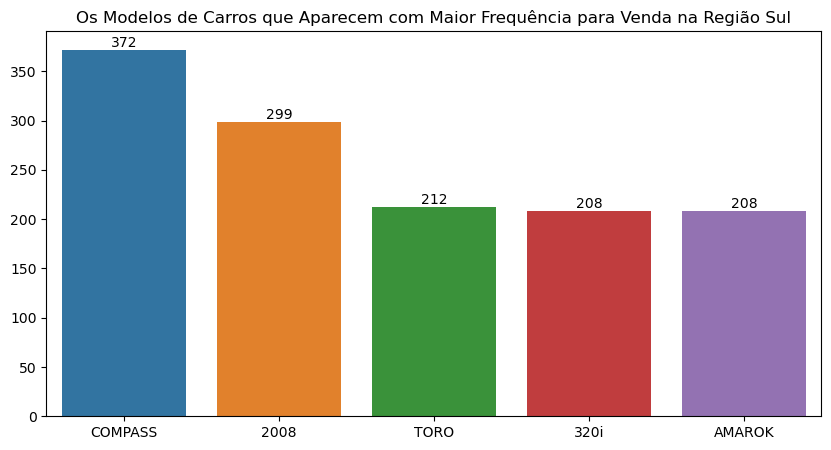

<IPython.core.display.Javascript object>

In [6]:
# Criando uma lista com os estados da região sul
sul = ["Rio Grande do Sul (RS)", "Santa Catarina (SC)", "Paraná (PR)"]

# Filtra o dataset com estados apenas da região sul
df_sul = df[df["estado_vendedor"].isin(sul)]

# Agrupa a quantidade de carros de acordo com o modelo
mais_vendido_sul = (
    df_sul.groupby("modelo")["id"].count().sort_values(ascending=False).head(5)
)

# Cria o dataframe para gerar o gráfico
list_values = []

for value in mais_vendido_sul.values:
    list_values.append(value)

df_mais_vendido_sul = pd.DataFrame({"Quantidade": list_values}, mais_vendido_sul.index)

# Gerando o gráfico
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=mais_vendido_sul.index, y="Quantidade", data=df_mais_vendido_sul)
plt.title(
    "Os Modelos de Carros que Aparecem com Maior Frequência para Venda na Região Sul"
)
plt.xlabel(None)
plt.ylabel(None)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

O modelo de carro que aparece com maior frequência para venda na região Sul é o modelo "Compass", com 372 unidades

### Qual é o tipo de carro que as concessionários menos possuem disponíveis para venda?


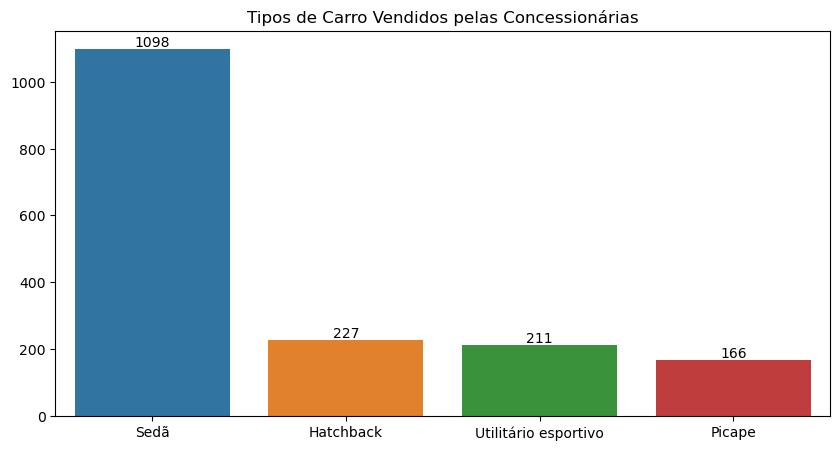

<IPython.core.display.Javascript object>

In [7]:
# Filtrando o dataset apenas com dados de concessionárias
df_concessionaria = df[df['anunciante'] == 'Concessionária']

# Agrupando por quantidade de cada tipo
carros_concessionaria = df_concessionaria.groupby('tipo')['id'].count().sort_values(ascending=False)

# Criando o dataframe para gerar o gráfico
list_values = []

for value in carros_concessionaria.values:
    list_values.append(value)
    
df_carros_concessionaria = pd.DataFrame({'Quantidade': list_values}, carros_concessionaria.index)

# Gerando o gráfico
plt.figure(figsize=(10,5))
ax = sns.barplot(x = carros_concessionaria.index,
                 y = 'Quantidade',
                 data = df_carros_concessionaria)
plt.title('Tipos de Carro Vendidos pelas Concessionárias')
plt.xlabel(None)
plt.ylabel(None)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()


O tipo de carro menos vendido pelas concessionárias é do tipo "Picape", com 166 unidades.

### Qual tipo de anunciante possui carros mais novos em média disponíveis para venda?

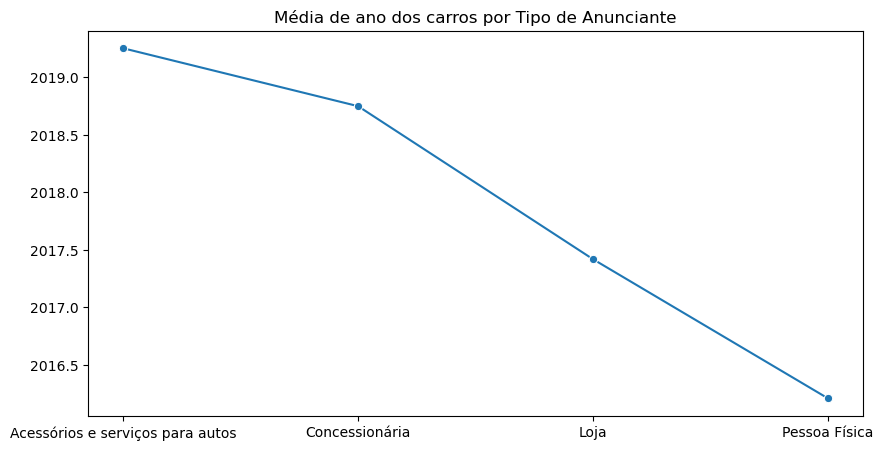

<IPython.core.display.Javascript object>

In [8]:
# Agrupando dataset por média de ano de fabricação de acordo com cada tipo de anunciante
anunciantes = df.groupby("anunciante")["ano_de_fabricacao"].mean()

# Criando o dataframe para gerar o gráfico
list_values = []

for value in anunciantes.values:
    list_values.append(value)

df_anunciantes = pd.DataFrame({"media_ano": list_values}, anunciantes.index)

# Gerando o gráfico
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=anunciantes.index, y="media_ano", data=df_anunciantes, marker="o")
plt.title("Média de ano dos carros por Tipo de Anunciante")
plt.xlabel(None)
plt.ylabel(None)

plt.show()

O tipo de anunciante que possui em média carros mais novos disponíveis para venda é "Acessórios e Serviços Para Autos"